Benjamin Bierlein 76418644
Econ 125 Spring 2025 HW 4

a)

In [ ]:
##Import necessary packages
import numpy as np  # Useful for math calculations
import pandas as pd  # Useful for data manipulation
import statsmodels.api as sm  # Useful for regression analysis
import statsmodels.formula.api as smf  # Required for regression using formulas
import matplotlib.pyplot as plt  # Useful for plotting

#Load Data
vac_df = pd.read_csv("/content/vacation.csv")
vac_df.head()
print(vac_df.head())

# Run OLS regression
ols_model = smf.ols('miles ~ income + age + kids', data=vac_df).fit()

# Print OLS regression summary
print(ols_model.summary())

# Extract and print the point estimate and 95% confidence interval for 'kids'
beta_kids = ols_model.params['kids']
conf_int_kids = ols_model.conf_int().loc['kids']

print(f"\nPoint estimate for 'kids' coefficient: {beta_kids:.2f}")
print(f"95% Confidence Interval for 'kids': ({conf_int_kids[0]:.2f}, {conf_int_kids[1]:.2f})")

   miles  income  age  kids
0    902      41   26     0
1    491      31   38     3
2   1841      87   40     2
3    406      54   48     4
4      0      77   43     4
                            OLS Regression Results                            
Dep. Variable:                  miles   R-squared:                       0.341
Model:                            OLS   Adj. R-squared:                  0.331
Method:                 Least Squares   F-statistic:                     33.75
Date:                Sat, 10 May 2025   Prob (F-statistic):           1.25e-17
Time:                        01:01:26   Log-Likelihood:                -1504.6
No. Observations:                 200   AIC:                             3017.
Df Residuals:                     196   BIC:                             3030.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          

b)

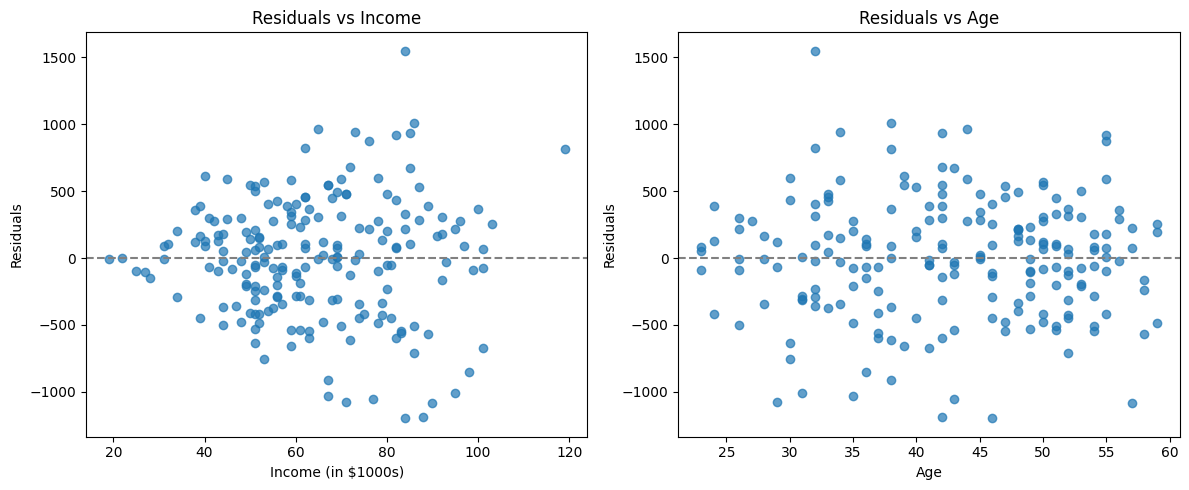

In [ ]:
#Calculate residuals
vac_df['residuals'] = ols_model.resid

# Create scatter plots of residuals vs income and age
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Residuals vs Income
axs[0].scatter(vac_df['income'], vac_df['residuals'], alpha=0.7)
axs[0].axhline(y=0, color='gray', linestyle='--')
axs[0].set_title('Residuals vs Income')
axs[0].set_xlabel('Income (in $1000s)')
axs[0].set_ylabel('Residuals')

# Residuals vs Age
axs[1].scatter(vac_df['age'], vac_df['residuals'], alpha=0.7)
axs[1].axhline(y=0, color='gray', linestyle='--')
axs[1].set_title('Residuals vs Age')
axs[1].set_xlabel('Age')
axs[1].set_ylabel('Residuals')

plt.tight_layout()
plt.show()


For residuals versus income,the variance increases as income increases. Perhaps people with higher income either have more financial freedom to travel or may have high demaning work that restricts travel. This plot indicates some heteroskedasticity.

For residuals versus age, there does not seem to be any pattern that indicates heteroskedasticity. There is more noticeable variance in the middle range of age (30-45).

In [ ]:
# Transform variables by dividing each by income (to handle heteroskedasticity assumption)
vac_df_gls = vac_df.copy()
vac_df_gls = vac_df_gls[vac_df_gls['income'] != 0]  # Avoid division by zero
vac_df_gls['y_star'] = vac_df_gls['miles'] / vac_df_gls['income']
vac_df_gls['age_star'] = vac_df_gls['age'] / vac_df_gls['income']
vac_df_gls['kids_star'] = vac_df_gls['kids'] / vac_df_gls['income']
vac_df_gls['const_star'] = 1 / vac_df_gls['income']

# Run transformed OLS model (GLS equivalent)
gls_model = sm.OLS(vac_df_gls['y_star'],
                   sm.add_constant(vac_df_gls[['const_star', 'age_star', 'kids_star']], has_constant='add')).fit()

# Extract estimate and CI for 'kids_star'
beta_gls_kids = gls_model.params['kids_star']
conf_int_gls_kids = gls_model.conf_int().loc['kids_star']
ci_gls_kids_lower, ci_gls_kids_upper = conf_int_gls_kids

# Format results
gls_kids_estimate = f"GLS point estimate for 'kids': {beta_gls_kids:.2f}"
gls_kids_ci = f"95% CI for 'kids': ({ci_gls_kids_lower:.2f}, {ci_gls_kids_upper:.2f})"

(gls_model.summary().as_text(), gls_kids_estimate, gls_kids_ci)


('                            OLS Regression Results                            \n==============================================================================\nDep. Variable:                 y_star   R-squared:                       0.147\nModel:                            OLS   Adj. R-squared:                  0.134\nMethod:                 Least Squares   F-statistic:                     11.25\nDate:                Sat, 10 May 2025   Prob (F-statistic):           7.64e-07\nTime:                        01:19:52   Log-Likelihood:                -664.11\nNo. Observations:                 200   AIC:                             1336.\nDf Residuals:                     196   BIC:                             1349.\nDf Model:                           3                                         \nCovariance Type:            nonrobust                                         \n==============================================================================\n                 coef    std err      

OLS CI: 95% Confidence Interval for 'kids': (-135.33, -28.32)


GLS CI: 95% CI for 'kids': (-119.89, -33.72)

Both intervals agree that as the number of kids increase there are fewer vacation miles. However, the GLS interval is narrower, this is because GLS is more efficient than OLS when the heteroskedasticity model is correctly specified.